# CLUSTERING (Unsupervised Machine Learning)

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.  
It is basically a type of unsupervised learning method. An unsupervised learning method is a method in which we draw references from datasets consisting of input data without labeled responses. Generally, it is used as a process to find meaningful structure, explanatory underlying processes, generative features, and groupings inherent in a set of examples.

### Dataset 

This Dataset is based on malls' customers. There are a total of 200 rows and 5 columns in this dataset. By using this dataset this data analysis and machine learning project is created.


### Problem :

Cluster the data based on Features 2 features namely Annual Income and Spending Score using K-means , hierarchical and DBSCAN clustering methods.

### importing necessay libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

#### Loading dataset: 

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### shape of the data

In [5]:
df.shape

(200, 5)

#### Information about all the columns in the Dataset:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Description of DataSet:

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Checking the Null Values in the Data Set:

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values on the dataset.

## EDA

#### Male vs Female Ratio:

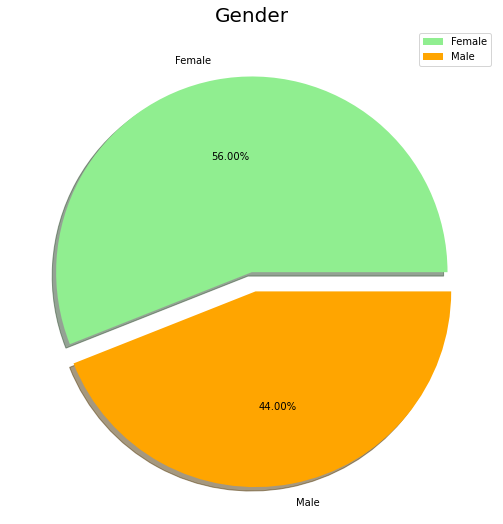

In [10]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

By looking at the above pie chart which explains about the distribution of Gender in the Mall  
  
Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that’s a huge gap especially when the population of Males is comparatively higher than Females.  

#### Age vs Annual Income:

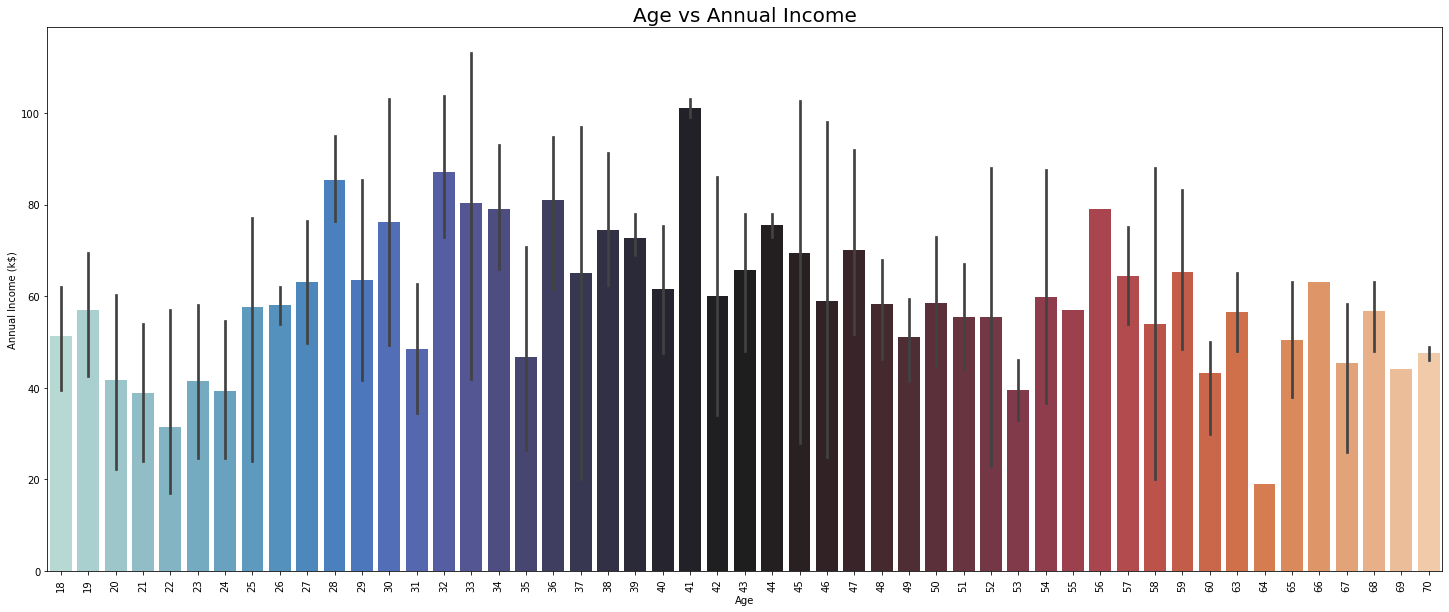

In [15]:
plt.figure(figsize=(25,10))
# Passing X axis and Y axis along with subplot position
plt.title('Age vs Annual Income', fontsize = 20)
plt.xticks(rotation=90)
sns.barplot(x = df['Age'] , y = df['Annual Income (k$)'] , palette='icefire');

The annual income is maximum at the age of 33 and 42.

#### Age Distribution:

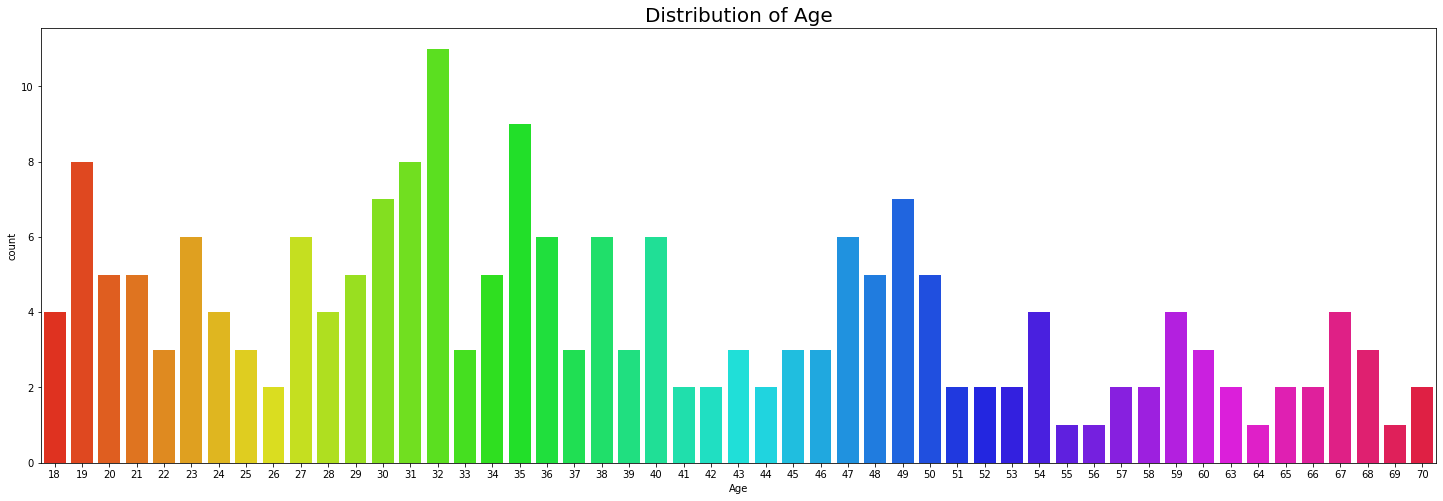

In [17]:
plt.rcParams['figure.figsize'] = (25, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group-wise patterns such as the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

#### Pair plot of Data:

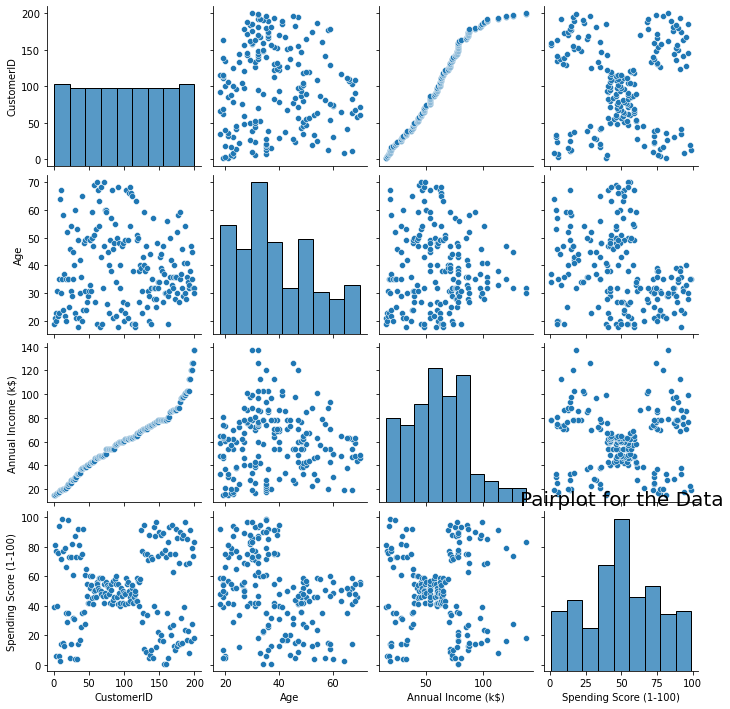

In [18]:
sns.pairplot(df)
plt.rcParams['figure.figsize'] = (25, 8)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

#### Heat Map of Data:

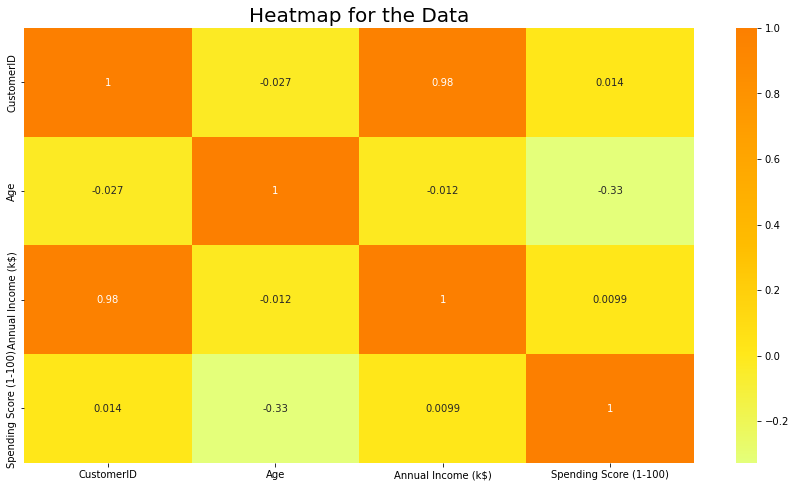

In [20]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segmentation Dataset, This Heat map reflects the most correlated features with Orange Color and the least correlated features with yellow color.  
  
We can clearly see that these attributes do not have a good correlation among them, that’s why we will proceed with all of the features.

#### Age vs Spending Score:

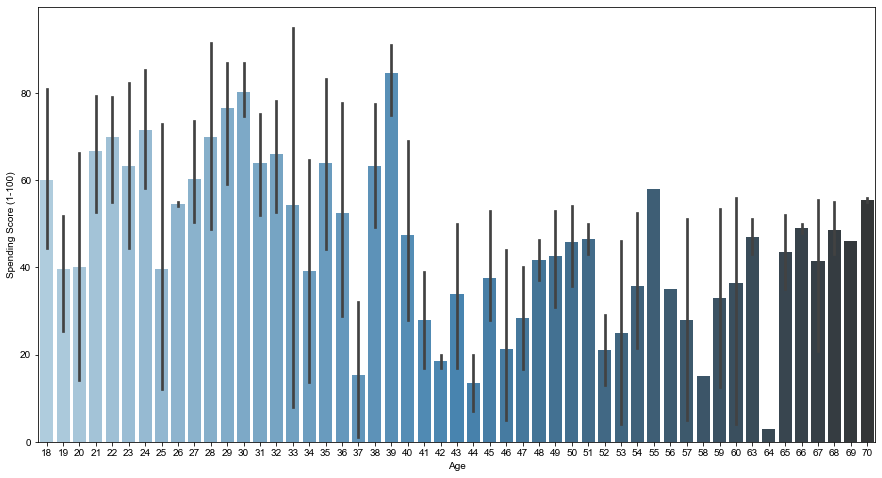

In [21]:
ax = sns.barplot(y= "Spending Score (1-100)", x = "Age", data = df, palette=("Blues_d"))
sns.set(rc={'figure.figsize':(27.7,6.30)})
sns.set_context("poster")

We can see that the age between 28 and 39 get the maximum spending score and the reason behind it is that their annual income is very high.  
  
#### Distribution of Spending Score:  

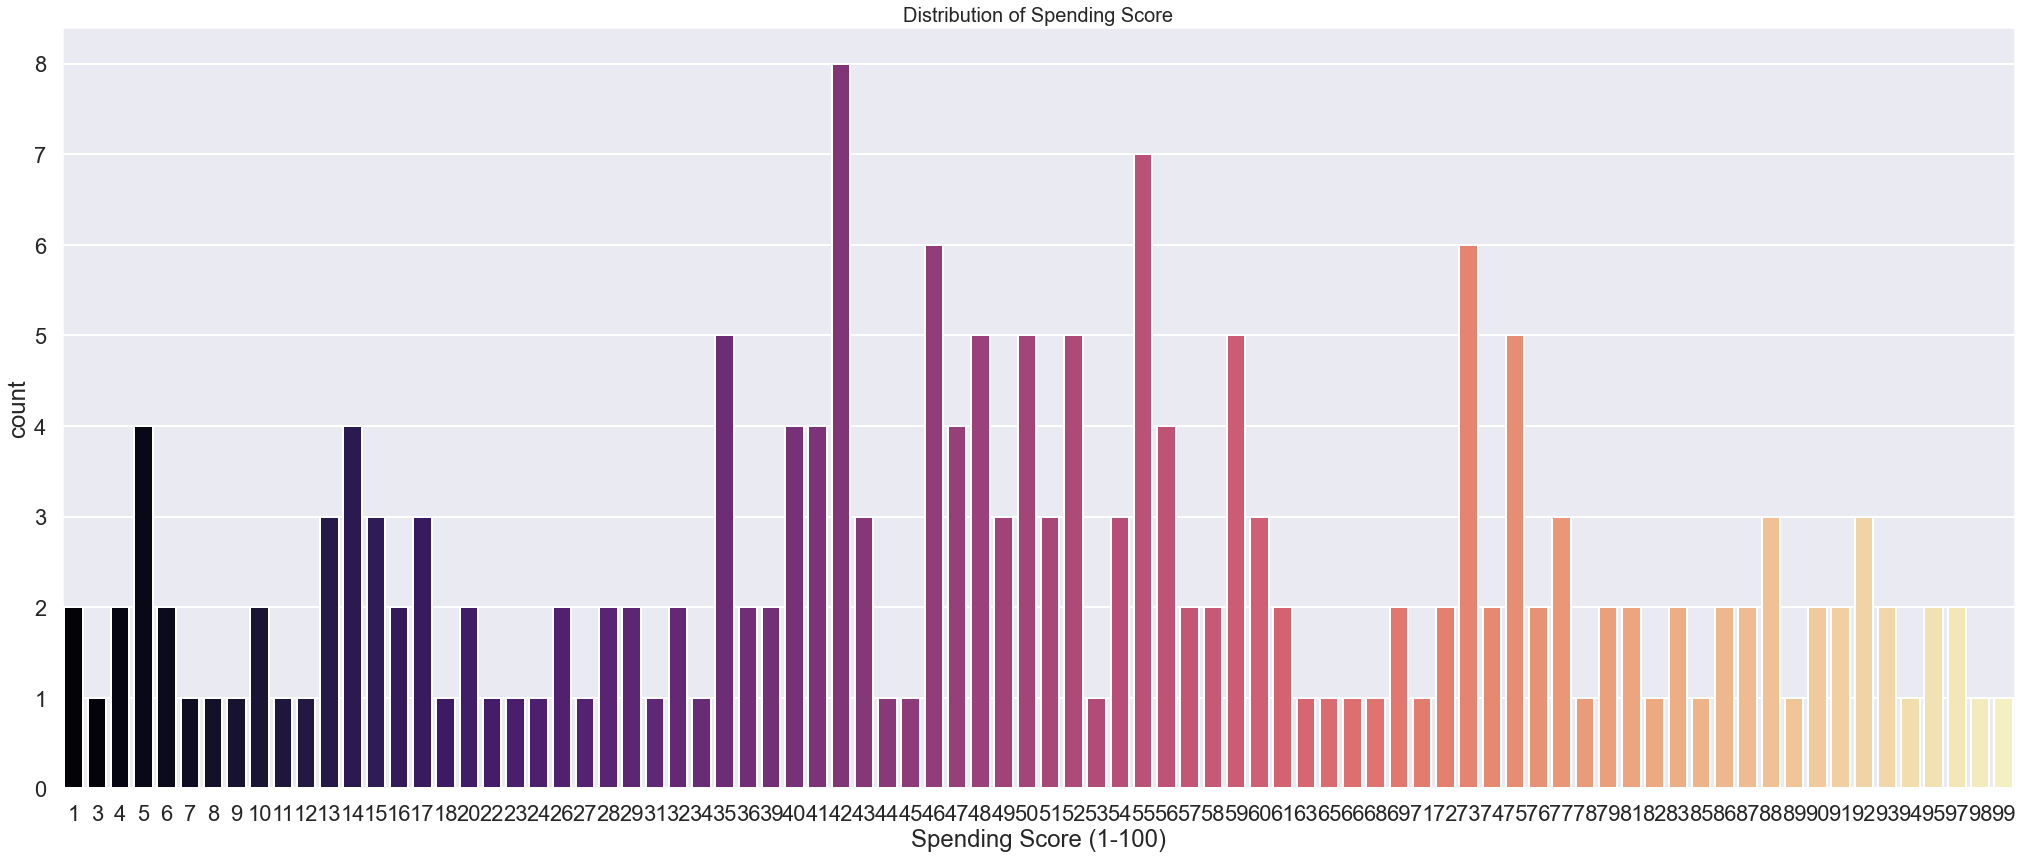

In [22]:
plt.rcParams['figure.figsize'] = (35, 14)
sns.countplot(df['Spending Score (1-100)'], palette = 'magma')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35–60. Interestingly there are customers having an I spending score also, and a 99 Spending score also, Which shows that the mall caters to a variety of Customers with Varying needs and requirements available in the Mall
  
#### Gender vs Spending Score:

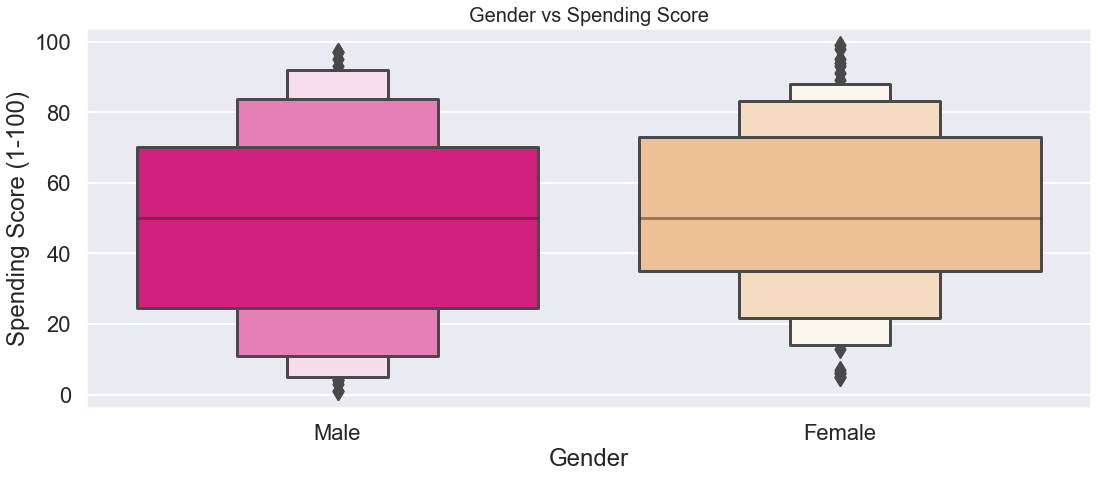

In [23]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['Gender'], df['Spending Score (1-100)'], palette = 'Accent_r')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

It is clearly visible that most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.

#### Gender vs Annual Income:

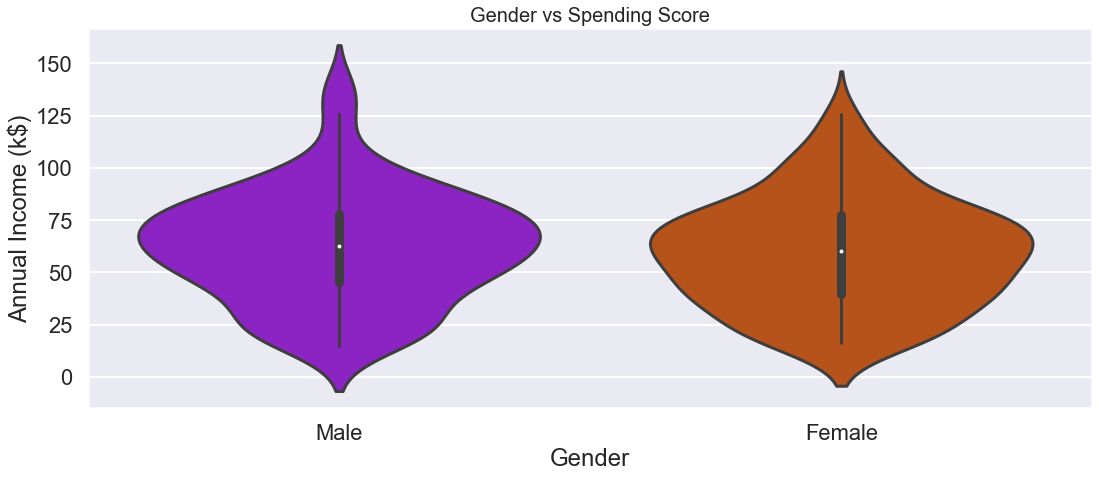

In [26]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['Gender'], df['Annual Income (k$)'], palette = 'gnuplot')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

From the above graph, we can see that there are more males who get paid more than females. But, The number of males and females is equal in number when it comes to low annual income.

#### Distribution of Spending Score:

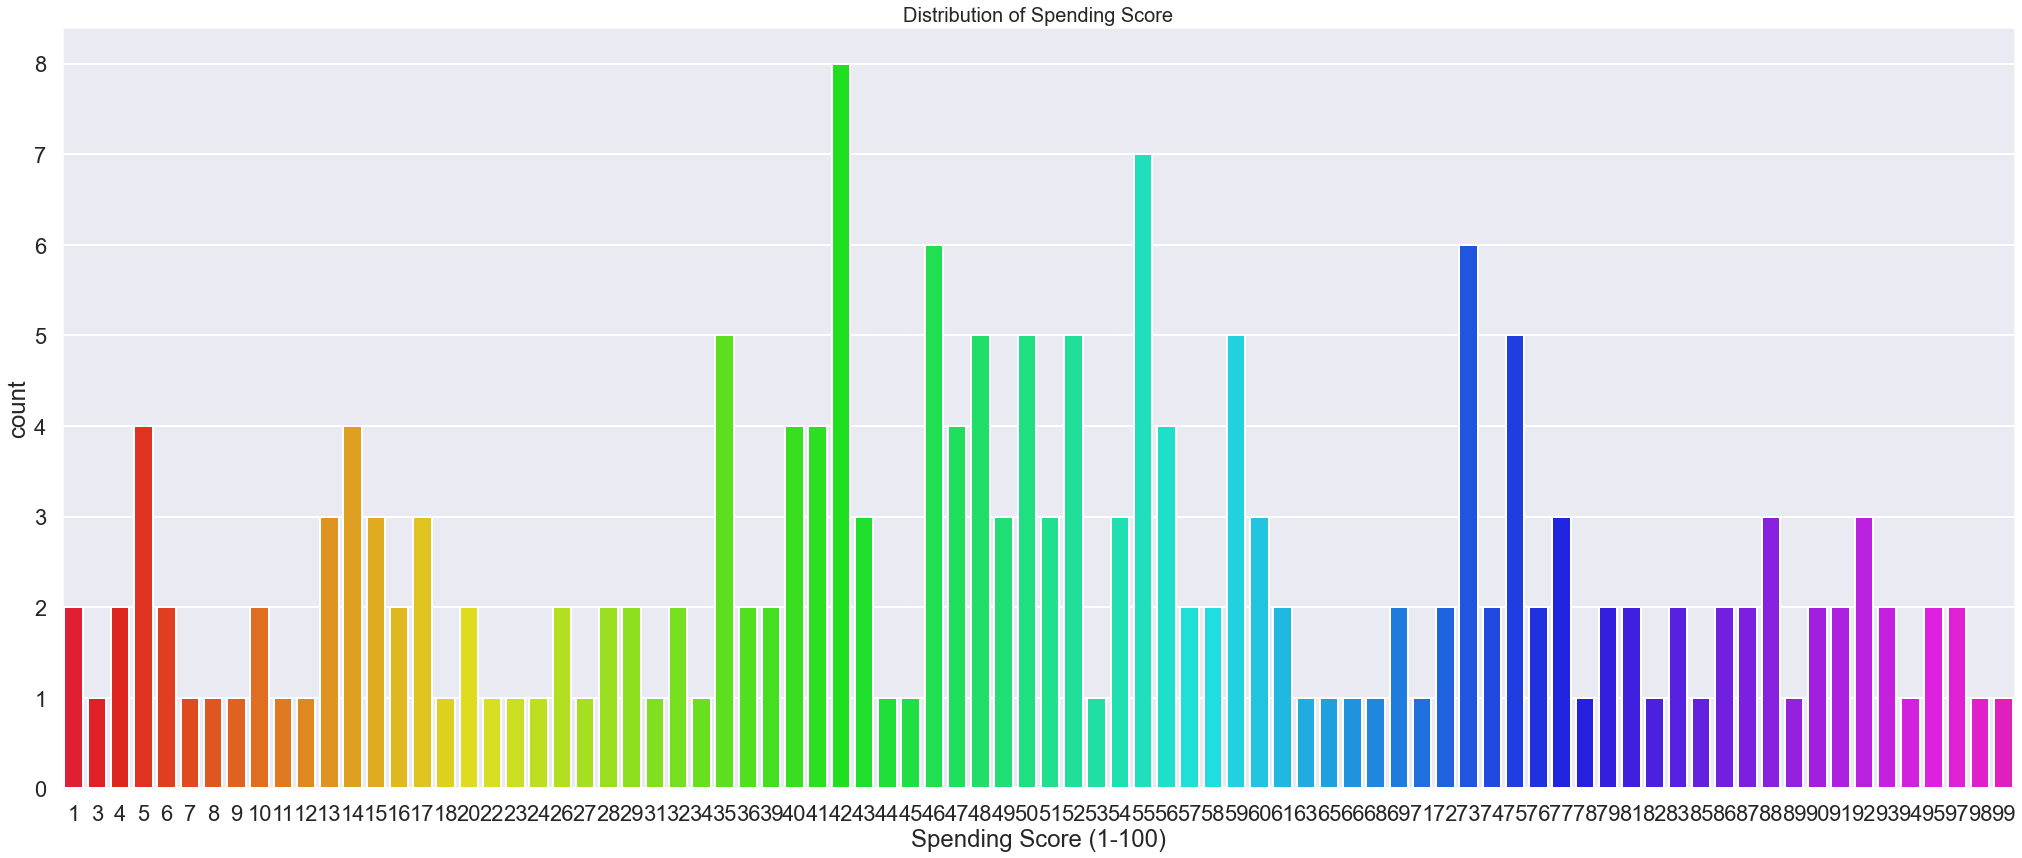

In [29]:
plt.rcParams['figure.figsize'] = (35, 14)
sns.countplot(df['Spending Score (1-100)'], palette = 'gist_rainbow')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

From the above graph, we can see that the total spending score by a single person is 99 and the maximum person get 42 as the total spending score.

#### Annual Income vs Spending Score:

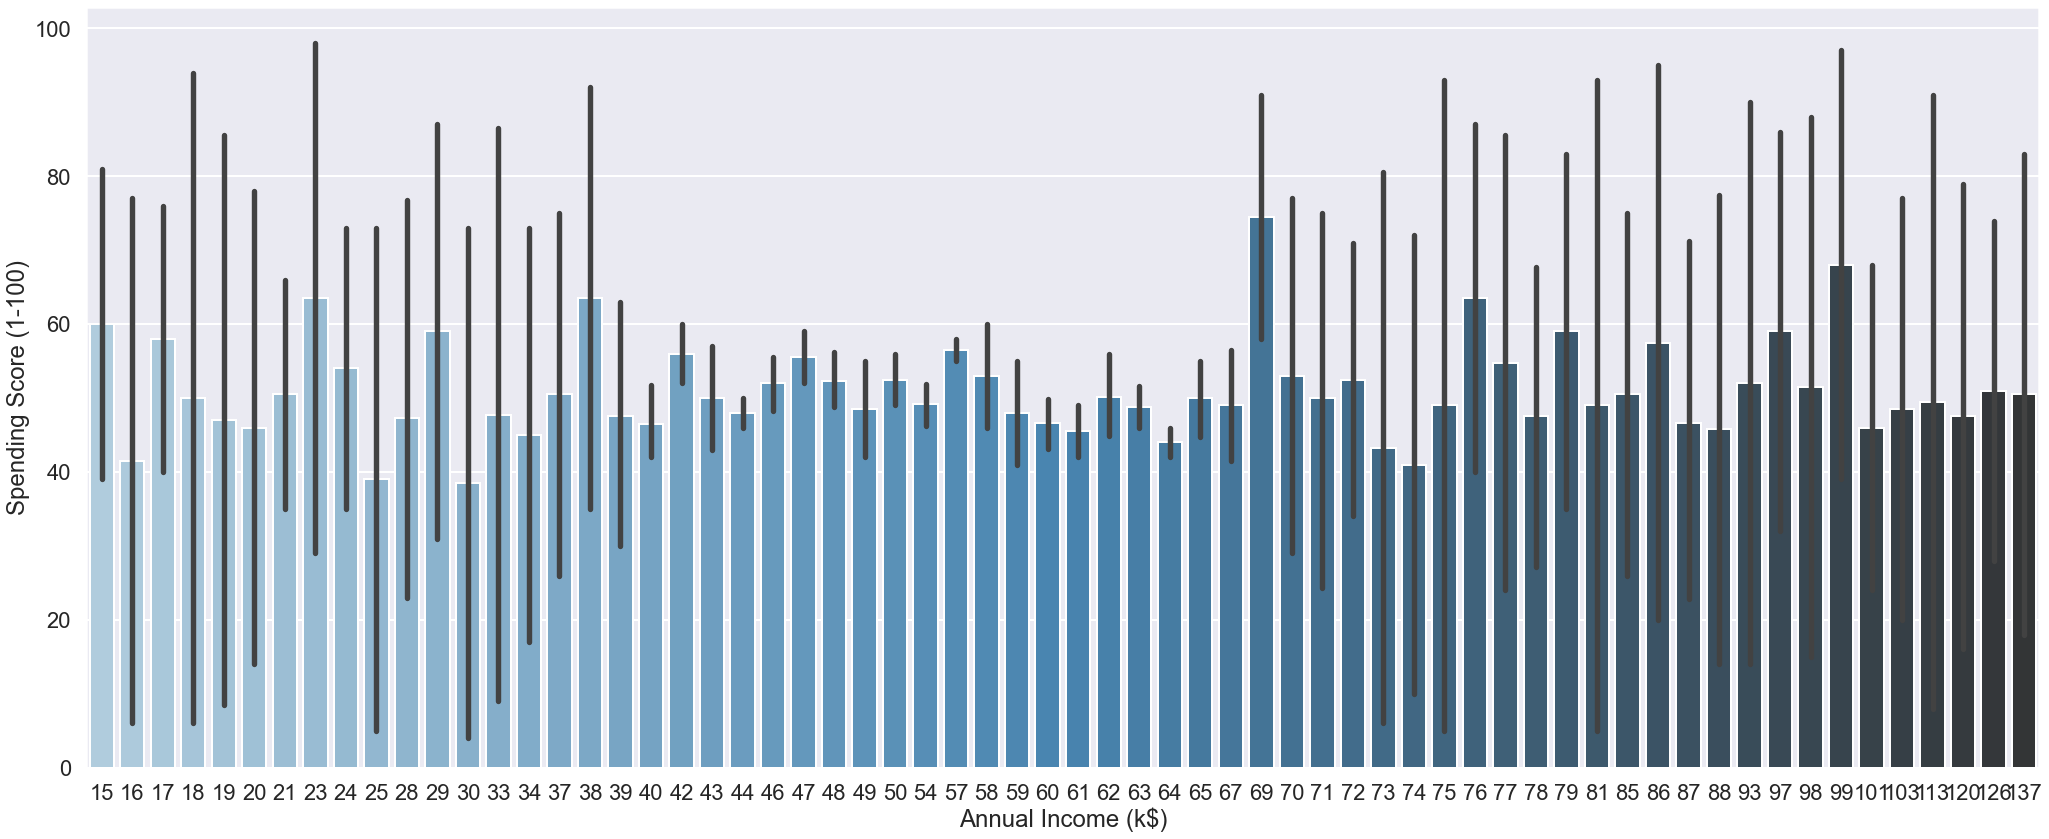

In [30]:
ax = sns.barplot(y= "Spending Score (1-100)", x = "Annual Income (k$)", data = df, palette=("Blues_d"))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("poster")

#### Annual Income vs Age and Spending Score:

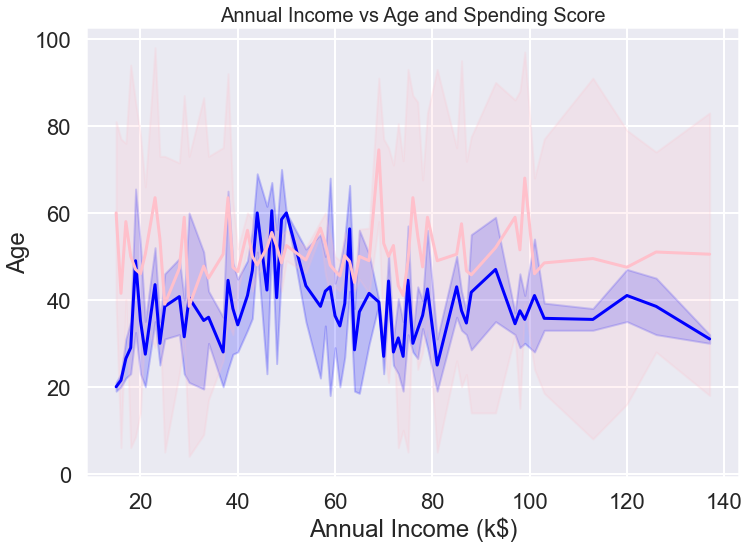

In [31]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']
sns.lineplot(x, y, color = 'blue', palette = 'Accent_r')
sns.lineplot(x, z, color = 'pink', palette = 'Accent_r')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

The above Plot Between Annual Income and Age represented by a blue color line and a plot between Annual Income and the Spending Score is represented by a pink color. It shows how Age and Spending Vary with Annual Income.

### Clustering based on 2 features
First, we work with two features only, annual income and spending score.

#### TAking Annual Income and spending score Features for Clustering

In [36]:
x = df.iloc[:, [3, 4]].values

In [37]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# K-Means Clustering

K-means clustering is a type of unsupervised learning which is used when you have unlabeled data. By using this algorithm you will try to find groups in the data. "k" value represent number of groups.

## Elbow Method to Find the Number of Optimal Clusters:
In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

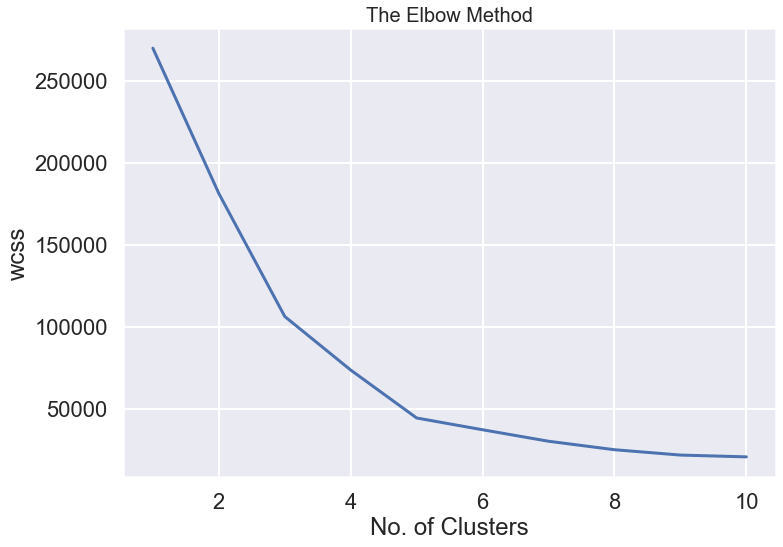

In [39]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In the above graph, the point after which the slope is getting decreased is called the elbow point.  
  
#### K Means Model Training on Training set:

In [40]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

### Visualizing Clusters:

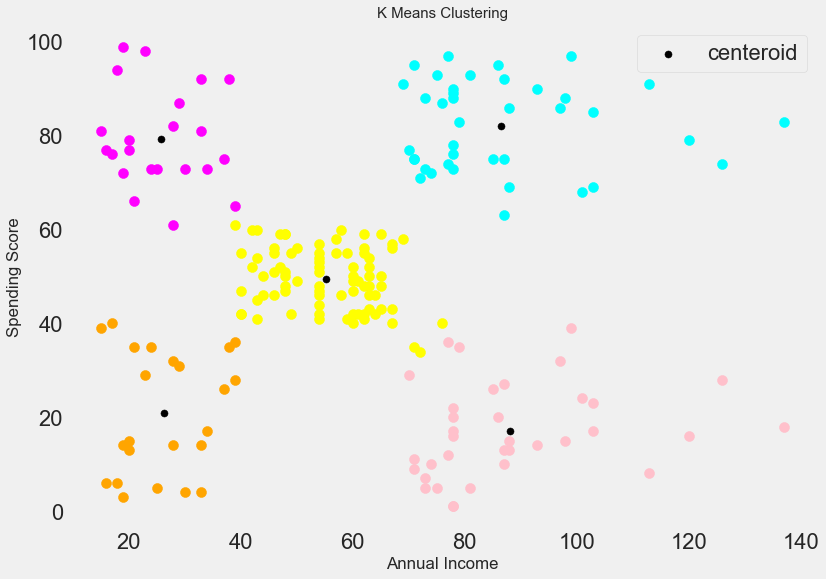

In [76]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show();


There are 5 CLusters in this method , each with their own Centroid represented by black dots.

# Hierarchical Clustering
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from the other cluster, and the objects within each cluster are broadly similar to each other. In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis that seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:
1. __Agglomerative__ : This is a “bottom-up” approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
2.__Divisive__ : This is a “top-down” approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

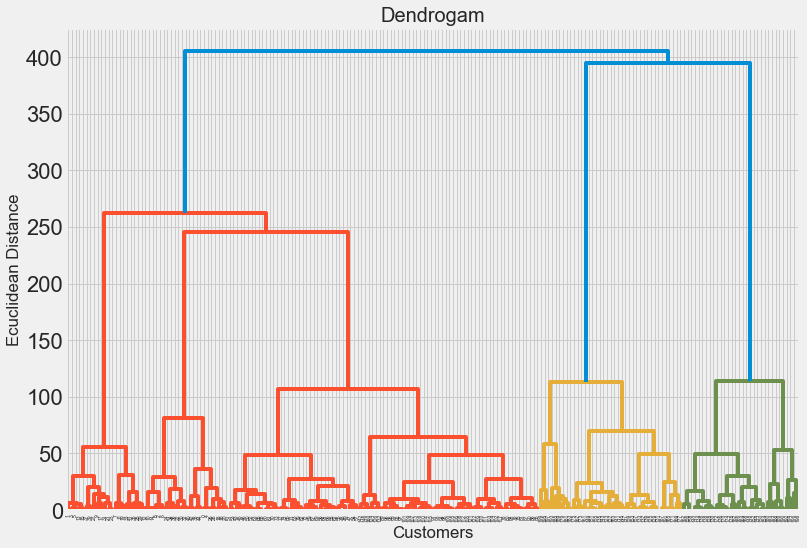

In [47]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

### Hierarchical Clustering Model Training on Training set:

In [48]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

### Visualizing Clusters:

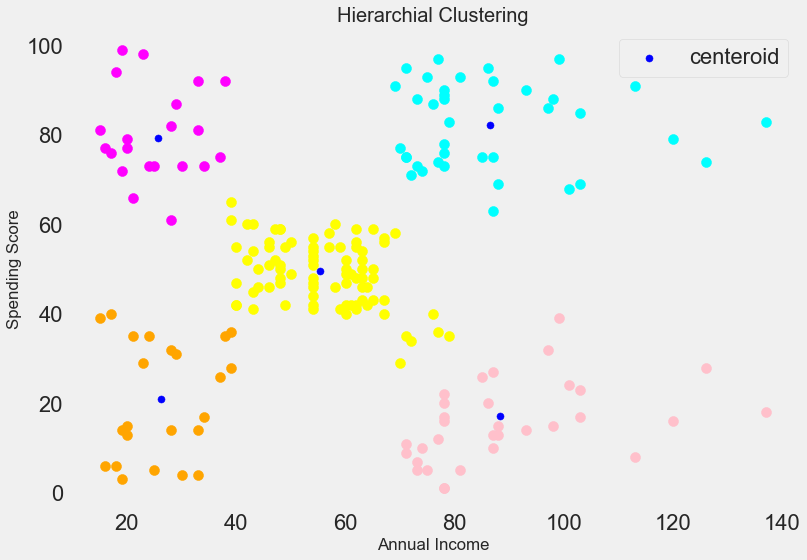

In [52]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

From the above scatter plot we can visualize different clusters among annual income and total spending scores. There is a total of 5 clusters are created in this scatter plot and the blue points are the centroid of the 5 clusters.

# DBSCAN Clustering

We are going to use the DBSCAN for algorithm for the purpose of clustering. It is an unsupervised machine learning algorithm. It is used for clusters of high density. It automatically predicts the outliers and removes it. It is better than hierarchical and k-means clustering algorithm. It makes the clusters based on the parameters like epsilon,min points and noise.It separately predicts the core points, border points and outliers efficiently.

In [69]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=10, min_samples=2).fit(x)

In [70]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 6


###  Visualizing Clusters: 

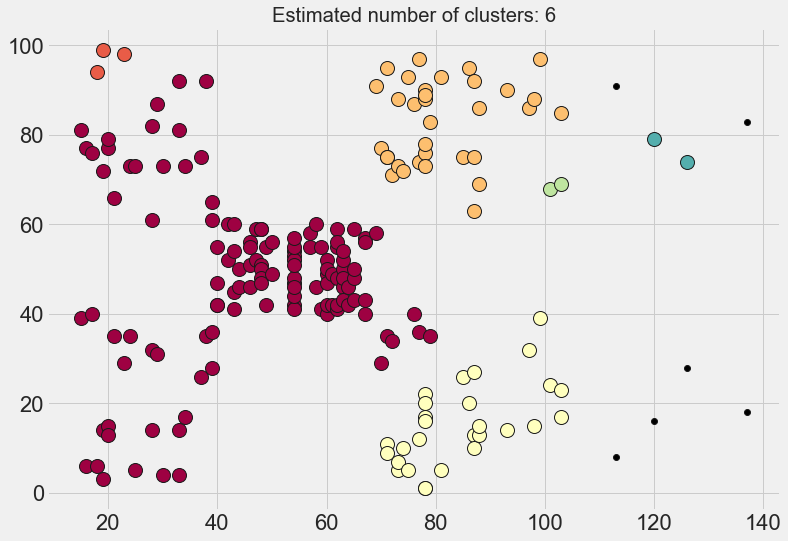

In [74]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacec=14,
    )
olor=tuple(col),
        markeredgecolor="k",
        markersize
    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

We have 6 Clusters and 6 Noise points in our data 

Performed By :
### Ankit Dubey